In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")

In [4]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 1.7 MB 48.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 4.7 MB/s 
     |████████████████████████████████| 167 kB 49.9 MB/s 
     |████████████████████████████████| 5.0 MB 42.5 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 141 kB 46.3 MB/s 
     |████████████████████████████████| 25.8 MB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 48.7 MB/s 
     |████████████████████████████████| 1.3 MB 69.7 MB/s 
     |████████████████████████████████| 16.5 MB 49.5 MB/s 
     |████████████████████████████████| 662 kB 63.5 MB/s 
     |████████████████████████████████|

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (4119, 21)


In [10]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'y', session_id=123) 

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=y, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_featu

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:50:34
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
job,Categorical
marital,Categorical
education,Categorical
default,Categorical
housing,Categorical
loan,Categorical
contact,Categorical
month,Categorical
day_of_week,Categorical


quit


SystemExit: ignored

In [13]:
from pycaret.classification import *
exp_mclf101 = setup(data = data,
                    target = 'y',
                    categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
                    numeric_features=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
                    session_id=123) 



,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                            'education',
                                                            'default',
                                                            'housing', 'loan',
                                                            'contact', 'month',
                                                            'day_of_week',
                                                            'poutcome'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['age', 'duration',
                                  

In [14]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9172,0.9491,0.5499,0.6460,0.5934,0.5477,0.5503,0.483
gbc,Gradient Boosting Classifier,0.9171,0.9468,0.5226,0.6544,0.5808,0.5355,0.5398,4.604
rf,Random Forest Classifier,0.9141,0.9397,0.4497,0.6625,0.5351,0.4897,0.5012,2.458
lr,Logistic Regression,0.9115,0.9326,0.4112,0.6568,0.5053,0.4595,0.4750,3.622
ada,Ada Boost Classifier,0.9105,0.9385,0.4010,0.6512,0.4956,0.4496,0.4659,1.075
lda,Linear Discriminant Analysis,0.9105,0.9353,0.5131,0.6120,0.5578,0.5085,0.5112,0.310
ridge,Ridge Classifier,0.9089,0.0000,0.3289,0.6790,0.4426,0.3995,0.4310,0.051
knn,K Neighbors Classifier,0.9069,0.8722,0.4869,0.5935,0.5347,0.4835,0.4866,1.237
et,Extra Trees Classifier,0.9040,0.9146,0.3454,0.6143,0.4417,0.3937,0.4135,3.053
dt,Decision Tree Classifier,0.8904,0.7317,0.5282,0.5023,0.5148,0.4531,0.4534,0.207


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.7391,0.5474,0.4937,0.5191,0.4563,0.4571
1,0.9048,0.7620,0.5789,0.5651,0.5719,0.5184,0.5184
2,0.8886,0.7283,0.5228,0.4934,0.5077,0.4449,0.4452
3,0.8936,0.7380,0.5385,0.5168,0.5274,0.4675,0.4676
4,0.8802,0.7106,0.4930,0.4593,0.4755,0.4080,0.4083
5,0.8805,0.7092,0.4895,0.4605,0.4746,0.4073,0.4075
6,0.8882,0.7258,0.5175,0.4933,0.5051,0.4422,0.4423
7,0.8936,0.7273,0.5140,0.5176,0.5158,0.4561,0.4561
8,0.8905,0.7370,0.5404,0.5016,0.5203,0.4586,0.4590


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [16]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [17]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.8756,0.4807,0.5805,0.5259,0.4735,0.4761
1,0.9106,0.8999,0.5123,0.6109,0.5573,0.5080,0.5104
2,0.9006,0.8625,0.4561,0.5579,0.5019,0.4473,0.4501
3,0.9048,0.8692,0.4825,0.5823,0.5277,0.4753,0.4779
4,0.9087,0.8760,0.5140,0.6000,0.5537,0.5031,0.5050
5,0.9056,0.8590,0.4510,0.5945,0.5129,0.4617,0.4671
6,0.9114,0.8736,0.5210,0.6157,0.5644,0.5154,0.5177
7,0.9091,0.8782,0.4755,0.6126,0.5354,0.4859,0.4907
8,0.9067,0.8705,0.4702,0.5956,0.5255,0.4746,0.4786


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [18]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9121,0.9263,0.4175,0.6575,0.5107,0.4651,0.4796
1,0.9156,0.9393,0.4105,0.6964,0.5166,0.4737,0.4936
2,0.9129,0.9254,0.4175,0.6648,0.5129,0.4678,0.4831
3,0.9125,0.9387,0.4510,0.6482,0.5320,0.4854,0.4951
4,0.9129,0.9336,0.4336,0.6596,0.5232,0.4775,0.4903
5,0.9040,0.9231,0.3741,0.6045,0.4622,0.4127,0.4271
6,0.9075,0.9392,0.3986,0.6264,0.4872,0.4391,0.4527
7,0.9141,0.9361,0.3846,0.7006,0.4966,0.4540,0.4785
8,0.9125,0.9326,0.4035,0.6686,0.5033,0.4585,0.4761


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9114,0.9432,0.5123,0.6160,0.5594,0.5106,0.5133
1,0.9191,0.9537,0.5579,0.6543,0.6023,0.5575,0.5597
2,0.9168,0.9455,0.5649,0.6364,0.5985,0.5523,0.5535
3,0.9206,0.9516,0.5664,0.6639,0.6113,0.5674,0.5696
4,0.9206,0.9523,0.6224,0.6449,0.6335,0.5890,0.5891
5,0.9071,0.9455,0.5245,0.5882,0.5545,0.5029,0.5039
6,0.9195,0.9506,0.5664,0.6559,0.6079,0.5633,0.5651
7,0.9187,0.9511,0.5105,0.6728,0.5805,0.5364,0.5427
8,0.9183,0.9486,0.5123,0.6667,0.5794,0.5350,0.5407


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [20]:
tuned_lightgbm = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9145,0.9422,0.5123,0.6376,0.5681,0.5212,0.5251
1,0.9179,0.9534,0.5368,0.6538,0.5896,0.5445,0.5478
2,0.9171,0.9456,0.5404,0.6471,0.5889,0.5433,0.5460
3,0.9225,0.9521,0.5699,0.6763,0.6186,0.5758,0.5785
4,0.9179,0.9516,0.5734,0.6431,0.6063,0.5606,0.5618
5,0.9145,0.9473,0.5210,0.6368,0.5731,0.5261,0.5293
6,0.9214,0.9512,0.5524,0.6752,0.6077,0.5645,0.5680
7,0.9222,0.9507,0.5175,0.6981,0.5944,0.5524,0.5600
8,0.9160,0.9474,0.4842,0.6603,0.5587,0.5135,0.5210


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [21]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9160,0.9282,0.4772,0.6634,0.5551,0.5101,0.5185
1,0.9156,0.9349,0.4877,0.6557,0.5594,0.5138,0.5207
2,0.9075,0.9143,0.5439,0.5849,0.5636,0.5120,0.5124
3,0.9156,0.9240,0.6224,0.6159,0.6191,0.5717,0.5717
4,0.9114,0.9268,0.5105,0.6186,0.5594,0.5106,0.5135
5,0.9087,0.9210,0.5210,0.5984,0.5570,0.5064,0.5079
6,0.9156,0.9320,0.5524,0.6345,0.5907,0.5439,0.5455
7,0.9210,0.9307,0.5594,0.6695,0.6095,0.5660,0.5688
8,0.9183,0.9224,0.4702,0.6872,0.5583,0.5150,0.5263


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [29]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9164,0.9234,0.5123,0.6518,0.5737,0.5281,0.5328
1,0.9198,0.9363,0.4947,0.6878,0.5755,0.5326,0.5414
2,0.9098,0.9144,0.4877,0.6123,0.5430,0.4937,0.4976
3,0.9171,0.9365,0.5315,0.6524,0.5857,0.5402,0.5437
4,0.9168,0.9326,0.5420,0.6458,0.5894,0.5434,0.5460
5,0.9102,0.9310,0.4371,0.6345,0.5176,0.4699,0.4799
6,0.9125,0.9280,0.4965,0.6311,0.5558,0.5080,0.5125
7,0.9183,0.9339,0.4755,0.6869,0.5620,0.5186,0.5292
8,0.9160,0.9297,0.4702,0.6667,0.5514,0.5066,0.5160


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [20]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


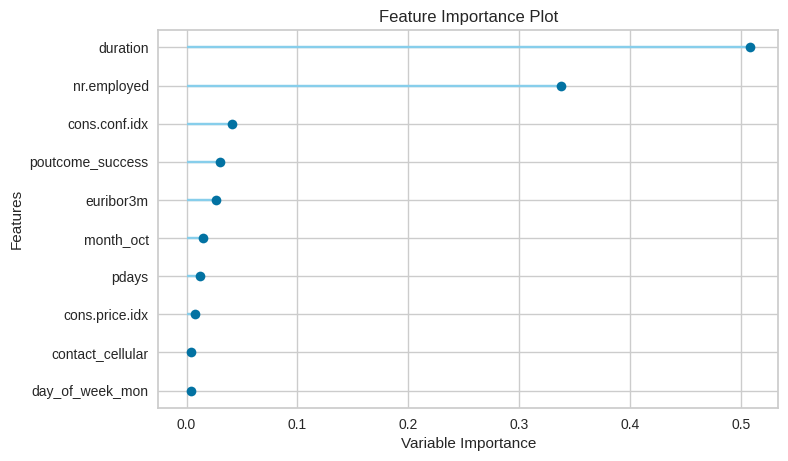

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_dt, plot = 'feature')

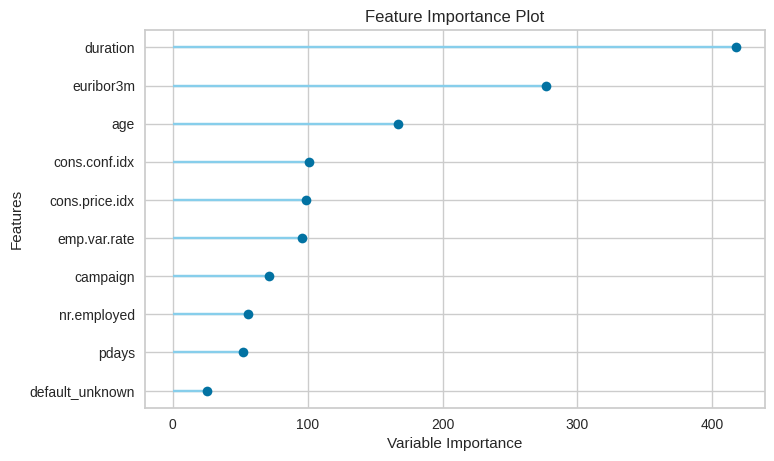

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_lightgbm, plot = 'feature')

In [25]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9141,0.9209,0.4842,0.6449,0.5531,0.5066,0.5130
1,0.9179,0.9334,0.4842,0.6765,0.5644,0.5205,0.5294
2,0.9098,0.9136,0.4807,0.6143,0.5394,0.4902,0.4947
3,0.9175,0.9344,0.5175,0.6607,0.5804,0.5354,0.5403
4,0.9141,0.9335,0.5140,0.6364,0.5687,0.5215,0.5252
5,0.9121,0.9280,0.4441,0.6480,0.5270,0.4804,0.4908
6,0.9106,0.9258,0.4755,0.6239,0.5397,0.4912,0.4967
7,0.9202,0.9334,0.4825,0.7005,0.5714,0.5291,0.5403
8,0.9152,0.9260,0.4526,0.6684,0.5397,0.4949,0.5064


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


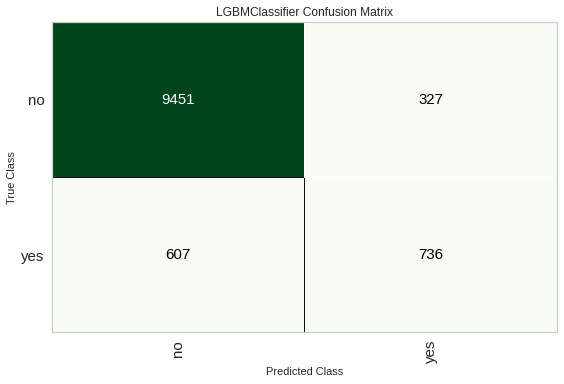

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

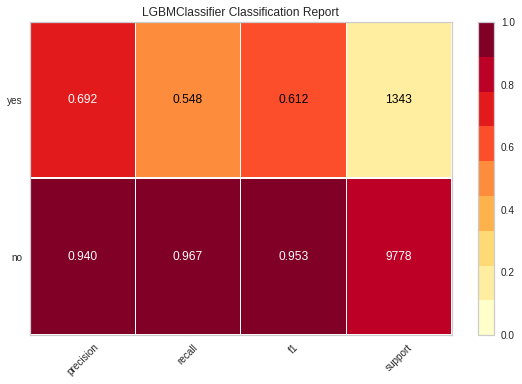

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_lightgbm, plot = 'class_report')

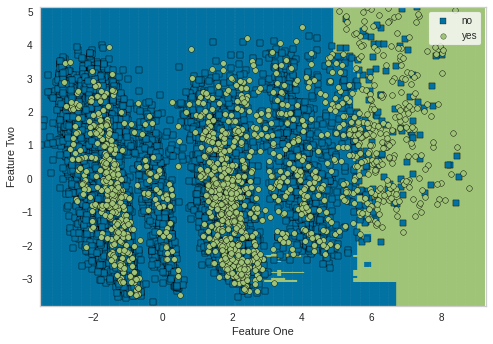

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_lightgbm, plot='boundary')

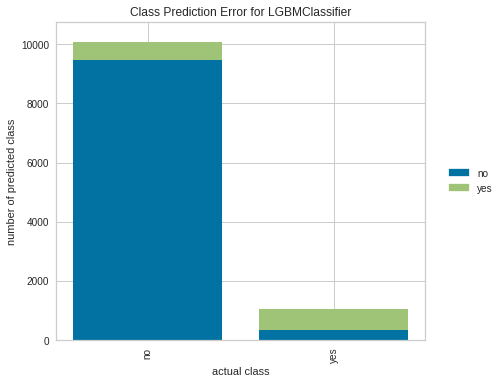

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_lightgbm, plot = 'error')

In [28]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.916,0.9497,0.548,0.6924,0.6118,0.5654,0.5703


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y,Label,Score
0,31.0,294.0,1.0,999.0,1.0,-1.8,92.892998,-46.200001,1.281,5099.100098,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,no,no,0.9297
1,39.0,70.0,1.0,999.0,0.0,-0.1,93.199997,-42.000000,4.120,5195.799805,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,no,no,0.9952
2,58.0,82.0,1.0,3.0,1.0,-2.9,92.469002,-33.599998,1.072,5076.200195,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,no,no,0.6225
3,53.0,494.0,1.0,2.0,1.0,-1.8,93.074997,-47.099998,1.365,5099.100098,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,yes,yes,0.7880
4,48.0,195.0,2.0,999.0,0.0,-1.8,93.369003,-34.799999,0.646,5008.700195,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.6779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26.0,127.0,7.0,999.0,0.0,1.4,93.917999,-42.700001,4.962,5228.100098,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9990
11117,36.0,79.0,1.0,999.0,0.0,1.4,94.464996,-41.799999,4.959,5228.100098,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9989
11118,39.0,277.0,2.0,999.0,0.0,1.1,93.994003,-36.400002,4.856,5191.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no,no,0.9969
11119,22.0,448.0,1.0,999.0,0.0,1.4,93.917999,-42.700001,4.962,5228.100098,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9323


In [32]:
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
      

In [33]:
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [34]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9421,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9986
1,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9984
2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9987
3,39,housemaid,married,basic.4y,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9973
4,55,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,0.9971
